In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df_atvi = pd.read_csv("atvi_weekly_return_volatility.csv")
df_spy = pd.read_csv("spy_weekly_return_volatility.csv")

Accuracy for k = 3 -> 76.92 %
Accuracy for k = 5 -> 65.38 %
Accuracy for k = 7 -> 59.62 %
Accuracy for k = 9 -> 55.77 %
Accuracy for k = 11 -> 55.77 %
Maximum Accuracy for Activision Blizzard -> 76.92 % for Neighbors -> 3


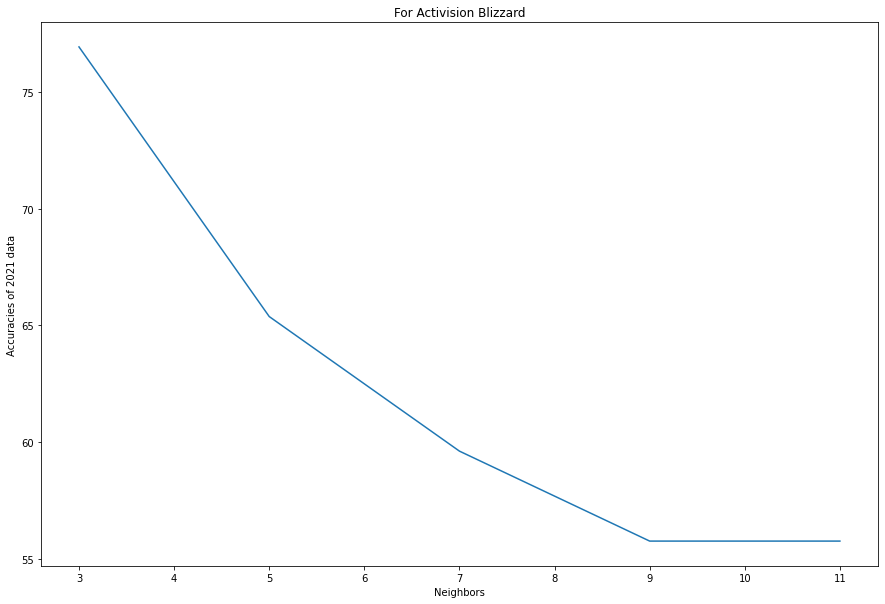

Accuracy for k = 3 -> 80.77 %
Accuracy for k = 5 -> 71.15 %
Accuracy for k = 7 -> 73.08 %
Accuracy for k = 9 -> 73.08 %
Accuracy for k = 11 -> 73.08 %
Maximum Accuracy for S&P 500 -> 80.77 % for Neighbors -> 3


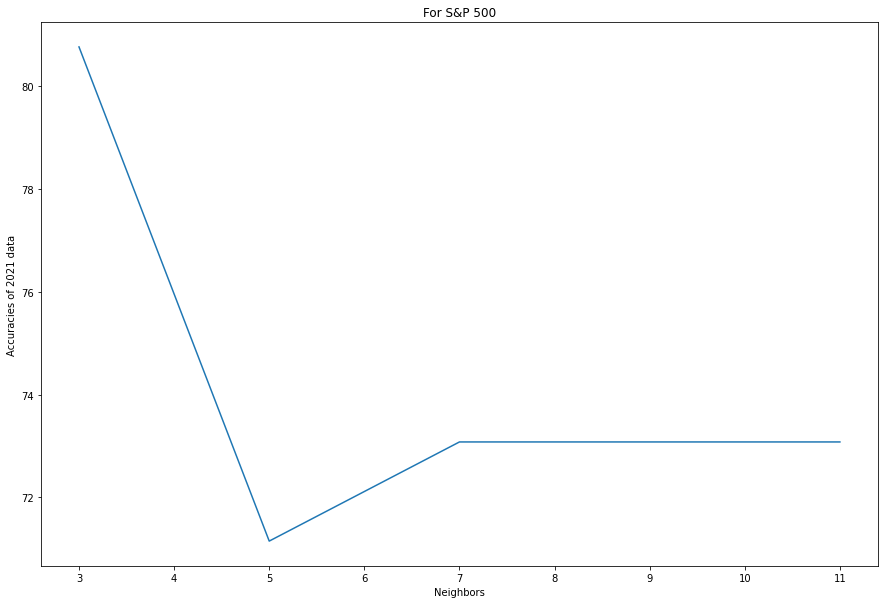

In [3]:
def train_on_2021(df, stocks):
    df_yr1 = df[df["Year"] == 2021][["mean_return", "volatility"]]
    df_yr1_label = df[df["Year"] == 2021]["Label"]
    k = [3, 5, 7, 9, 11]
    acc = []
    for i in k:
        ss = StandardScaler()
        knn_i = KNeighborsClassifier(n_neighbors=i)
        ss.fit(df_yr1)
        df_yr1_trans = ss.transform(df_yr1)
        knn_i.fit(df_yr1_trans, df_yr1_label)
        df_yr1_pred = knn_i.predict(df_yr1_trans)
        accuracy = round(accuracy_score(df_yr1_label, df_yr1_pred)*100, 2)
        print(f"Accuracy for k = {i} -> {accuracy} %")
        acc.append(accuracy)
    
    print(f"Maximum Accuracy for {stocks} -> {max(acc)} % for Neighbors -> {k[acc.index(max(acc))]}")
    plt.figure(figsize=(15, 10))
    plt.plot(k, acc)
    plt.xlabel("Neighbors")
    plt.ylabel("Accuracies of 2021 data")
    plt.title(f"For {stocks}")
    plt.show()

train_on_2021(df_atvi, "Activision Blizzard")
train_on_2021(df_spy, "S&P 500")


For Activision Blizzard
Accuracy -> 36.54 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

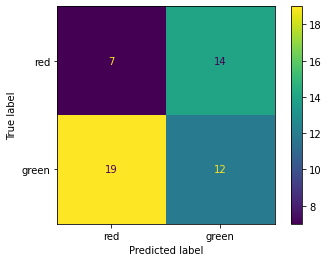

Recall -> 38.71 %
Sensitivity -> 33.33 %


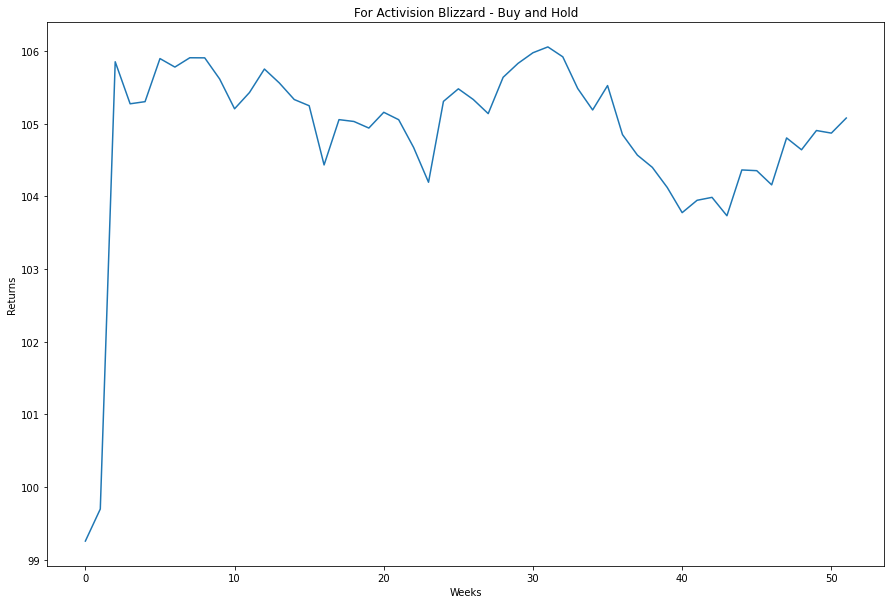

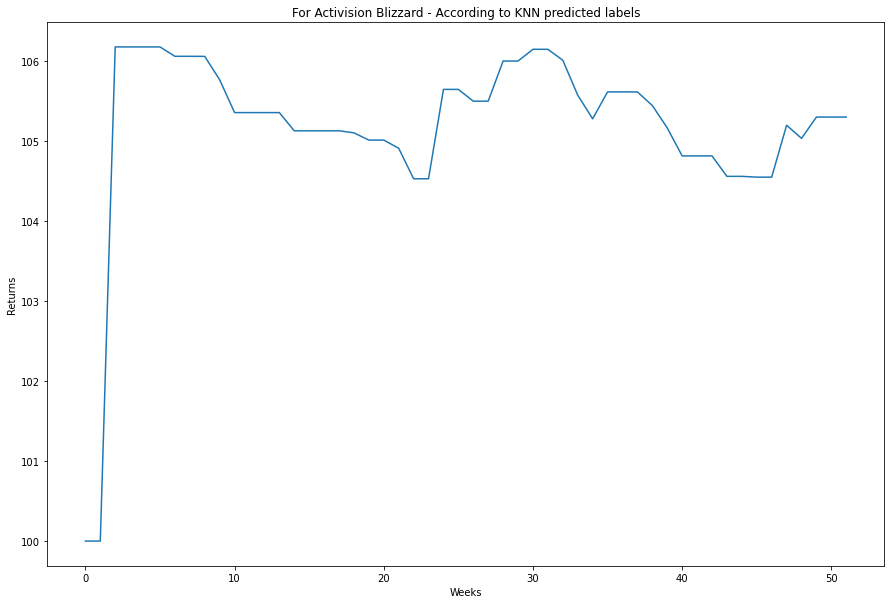

Final amount for BnH -> $ 105.08
Final amount for KNN -> $ 105.3

For S&P 500
Accuracy -> 44.23 %
Confusion Matrix -> 


<Figure size 1080x720 with 0 Axes>

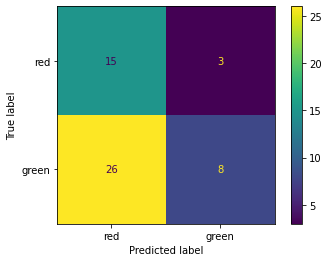

Recall -> 23.53 %
Sensitivity -> 83.33 %


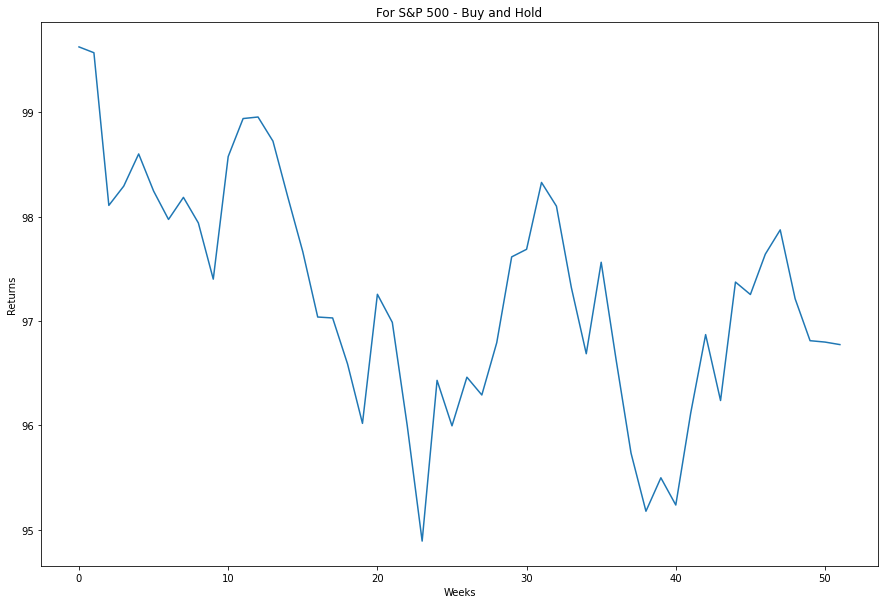

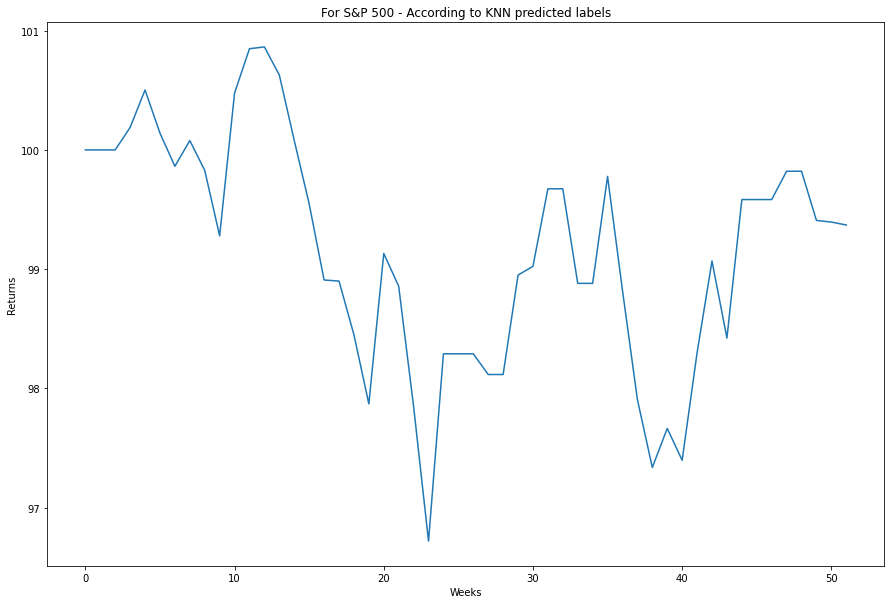

Final amount for BnH -> $ 96.77
Final amount for KNN -> $ 99.37


In [4]:
def test_on_2022(df, stocks, k_max):
    print(f"\nFor {stocks}")
    knn = KNeighborsClassifier(n_neighbors = k_max)
    df_yr1 = df[df["Year"] == 2021][["mean_return", "volatility"]]
    df_yr1_label = df[df["Year"] == 2021]["Label"]
    df_yr2 = df[df["Year"] == 2022][["mean_return", "volatility"]]
    df_yr2_label = df[df["Year"] == 2022]["Label"]
    
    ss = StandardScaler()
    ss.fit(df_yr1)
    df_yr1_trans = ss.transform(df_yr1)
    knn.fit(df_yr1_trans, df_yr1_label)
    df_yr2_trans = ss.transform(df_yr2)
    df_yr2_pred = knn.predict(df_yr2_trans)
    
    accuracy = round(accuracy_score(df_yr2_label, df_yr2_pred)*100, 2)
    print(f"Accuracy -> {accuracy} %")
    conf_matrix = confusion_matrix(df_yr2_label, df_yr2_pred)
    print("Confusion Matrix -> ")
    
    plt.figure(figsize=(15, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                            display_labels=["red", "green"])
    disp.plot()
    plt.show()
    
    tn = conf_matrix[0][0]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    fp = conf_matrix[0][1]
    tpr = round((tp/(tp + fn))*100, 2)
    tnr = round((tn/(tn + fp))*100, 2)
    print(f"Recall -> {tpr} %")
    print(f"Sensitivity -> {tnr} %")
    
    i1, i2 = 100, 100
    bnh = []
    trade_knn = []
    df_yr2_ret = np.array(df_yr2["mean_return"])
    for i in range(df_yr2_pred.shape[0]):
        i1 = i1*(1 + df_yr2_ret[i]/100)
        if df_yr2_pred[i] == "green":
            i2 = i2*(1 + df_yr2_ret[i]/100)
        bnh.append(i1)
        trade_knn.append(i2)

    plt.figure(figsize=(15, 10))
    plt.plot(bnh)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - Buy and Hold")
    plt.show()
    
    plt.figure(figsize=(15, 10))
    plt.plot(trade_knn)
    plt.xlabel("Weeks")
    plt.ylabel("Returns")
    plt.title(f"For {stocks} - According to KNN predicted labels")
    plt.show()
    
    print(f"Final amount for BnH -> $ {round(i1, 2)}")
    print(f"Final amount for KNN -> $ {round(i2, 2)}")

atvi_pred = test_on_2022(df_atvi, "Activision Blizzard", 3)
spy_pred = test_on_2022(df_spy, "S&P 500", 3)